# PREDICCIÓN DE PROBABILIDAD DE CHURN (TELCO COSTUMER CHURN)

Autor: Eduardo Esteban Jara Hidalgo.

## 1. IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import compose
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import ADASYN

from sklearn.preprocessing import StandardScaler

from sklearn import ensemble
from sklearn import linear_model
from sklearn import manifold
from sklearn import neighbors
from sklearn import pipeline
from sklearn import svm
from sklearn import tree
import xgboost as xgb

from sklearn import metrics
from sklearn import model_selection

import statsmodels.api as sm

import warnings; warnings.filterwarnings("ignore")

## 2. CARGA DATA SET

In [2]:
ruta='C:/Users/djara/Desktop/Trabajo/Postulación/Lipigas/Archivo data - 2023.csv'
data_inicial = pd.read_csv(ruta)


## 3. EDA (ACOTADO A REQUERIMIENTOS DEL PROBLEMA)

### 3.1. DIMENSIONES Y VISUALIZACIÓN DE DATA SET

In [3]:
print('Dimensiones de data_inicial (r,c):', data_inicial.shape)
pd.options.display.max_columns = 21
data_inicial

Dimensiones de data_inicial (r,c): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,30,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,1020,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,60,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,1350,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,60,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,720,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,2160,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,330,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,120,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 3.2. VALORES, TIPOS DE DATOS, MEDIDAS DE TENDENCIA CENTRAL Y DESVIACIÓN

In [4]:
print(data_inicial.dtypes)
data_inicial.describe(include='all')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,971.134460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,736.784431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,270.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,870.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,1650.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


* observación 1: TotalCharges se cargó como variable tipo object y se observa un valor vacío, o con espacios por determinar, con una frecuencia de 11 registros.

* observación 2: tenure presenta registros con valor 0.

* observación 3: las variables tipo object, gender, Partner, Dependents, PhoneService, PaperlessBilling y Churn, dicotómicas o booleanas, tienen 2 valores únicos y corresponden a los indicados en la documentación.


In [5]:
columns = ['SeniorCitizen', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod']

valores = data_inicial[columns].apply(pd.value_counts)

print(valores) 

                           SeniorCitizen  MultipleLines  InternetService  \
0                                 5901.0            NaN              NaN   
1                                 1142.0            NaN              NaN   
Bank transfer (automatic)            NaN            NaN              NaN   
Credit card (automatic)              NaN            NaN              NaN   
DSL                                  NaN            NaN           2421.0   
Electronic check                     NaN            NaN              NaN   
Fiber optic                          NaN            NaN           3096.0   
Mailed check                         NaN            NaN              NaN   
Month-to-month                       NaN            NaN              NaN   
No                                   NaN         3390.0           1526.0   
No internet service                  NaN            NaN              NaN   
No phone service                     NaN          682.0              NaN   
One year    

In [6]:
data_inicial.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* Observación 4: El resto de variables tipo object (sin considerar TotalCharges), categóricas y numérica binaria en el caso de SeniorCitizen, presentan los valores indicados en la documentación.

In [7]:
print( 'Dimensiones registros con PhoneService = No y MultipleLines != No phone service: ',
        data_inicial.loc[(data_inicial['PhoneService']=='No') & (data_inicial['MultipleLines'] != 'No phone service')].shape)

print( 'Dimensiones registros con PhoneService = Yes y MultipleLines == No phone service: ',
        data_inicial.loc[(data_inicial['PhoneService']=='Yes') & (data_inicial['MultipleLines'] == 'No phone service')].shape)

print( 'Dimensiones registros con InternetService = No y productos online con valor != No internet service: ',
        data_inicial.loc[(data_inicial['InternetService']=='No') &  (
                                                                    (data_inicial['OnlineSecurity'] != 'No internet service')
                                                                    |
                                                                    (data_inicial['OnlineBackup'] != 'No internet service')
                                                                    |
                                                                    (data_inicial['DeviceProtection'] != 'No internet service')
                                                                    |
                                                                    (data_inicial['TechSupport'] != 'No internet service')
                                                                    |
                                                                    (data_inicial['StreamingTV'] != 'No internet service')
                                                                    |
                                                                    (data_inicial['StreamingMovies'] != 'No internet service')
                                                                    )
                        ].shape)

print( 'Dimensiones registros con InternetService != No y productos online con valor = No internet service: ',
        data_inicial.loc[(data_inicial['InternetService'] !='No') & (
                                                                    (data_inicial['OnlineSecurity'] == 'No internet service')
                                                                    |
                                                                    (data_inicial['OnlineBackup'] == 'No internet service')
                                                                    |
                                                                    (data_inicial['DeviceProtection'] == 'No internet service')
                                                                    |
                                                                    (data_inicial['TechSupport'] == 'No internet service')
                                                                    |
                                                                    (data_inicial['StreamingTV'] == 'No internet service')
                                                                    |
                                                                    (data_inicial['StreamingMovies'] == 'No internet service')
                                                                    )
                        ].shape)

Dimensiones registros con PhoneService = No y MultipleLines != No phone service:  (0, 21)
Dimensiones registros con PhoneService = Yes y MultipleLines == No phone service:  (0, 21)
Dimensiones registros con InternetService = No y productos online con valor != No internet service:  (0, 21)
Dimensiones registros con InternetService != No y productos online con valor = No internet service:  (0, 21)


* Observación 5: todos los registros con PhoneService = No, presentan MultipleLines = No phone service. Además, todos los registros con InternetService = No, presentan el valor No internet service en sus variables de productos online.

### 3.3. VARIABLE TotalCharges

In [8]:
data_inicial.loc[data_inicial['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
TotalCharges_aux = data_inicial.loc[~(data_inicial['TotalCharges']== ' ')]['TotalCharges']
TotalCharges_aux = TotalCharges_aux.astype('float64')
RIQ = np.percentile(TotalCharges_aux, 75) - np.percentile(TotalCharges_aux, 25)
print(  'Dimensiones de registros outliers: ',
        TotalCharges_aux.loc[(TotalCharges_aux < (np.percentile(TotalCharges_aux, 25) - RIQ * 1.5))
                             |
                             (TotalCharges_aux > (np.percentile(TotalCharges_aux, 75) + RIQ * 1.5))
                            ].shape)
TotalCharges_aux.describe()

Dimensiones de registros outliers:  (0,)


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

* Observación 6: los únicos registros no numéricos corresponden a registros con valor string = ' ' (11 registros)
* Observación 7: sin outliers por criterio de distancia superior a 1,5 veces el rango inter cuartílico (RIQ).

### 3.4. VARIABLE TENURE

In [10]:
tenure_cero = data_inicial.loc[data_inicial['tenure']==0]
print(tenure_cero.shape)
tenure_cero

(11, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
tenure_aux = data_inicial.loc[~(data_inicial['tenure']==0)]['tenure']

RIQ = np.percentile(tenure_aux, 75) - np.percentile(tenure_aux, 25)
print(  'Dimensiones de registros outliers: ',
        tenure_aux.loc[(tenure_aux < (np.percentile(tenure_aux, 25) - RIQ * 1.5))
                       |
                       (tenure_aux > (np.percentile(tenure_aux, 75) + RIQ * 1.5))
                      ].shape)

tenure_aux.describe()

Dimensiones de registros outliers:  (0,)


count    7032.000000
mean      972.653584
std       736.357791
min        30.000000
25%       270.000000
50%       870.000000
75%      1650.000000
max      2160.000000
Name: tenure, dtype: float64

In [12]:
tenure_aux2 = data_inicial.loc[data_inicial['tenure'] > 30]['tenure']
tenure_aux2.describe()

count    6419.000000
mean     1062.674871
std       707.838054
min        60.000000
25%       390.000000
50%       990.000000
75%      1740.000000
max      2160.000000
Name: tenure, dtype: float64

* Observación 8: se encuentra que los registros con tenure = 0 corresponden a aquellos donde la variable TotalCharges = ' ' (11 registros).

* Obesrvación 9: el resto de registros de tenure, donde tenure != 0, presentan una distribución con un mínimo en 30 días (supuesto: 1 mes calendario) y el incremento en la distribución es siempre de 30. En base a lo anterior, no presenta outliers.

### 3.5. VARIABLE MonthlyCharges

In [13]:
RIQ = np.percentile(data_inicial['MonthlyCharges'], 75) - np.percentile(data_inicial['MonthlyCharges'], 25)
print(  'Dimensiones de registros outliers: ',
        data_inicial['MonthlyCharges'].loc[(data_inicial['MonthlyCharges'] < (np.percentile(data_inicial['MonthlyCharges'], 25) - RIQ * 1.5))
                                           |
                                           (data_inicial['MonthlyCharges'] > (np.percentile(data_inicial['MonthlyCharges'], 75) + RIQ * 1.5))
                                          ].shape)

data_inicial['MonthlyCharges'].describe()

Dimensiones de registros outliers:  (0,)


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

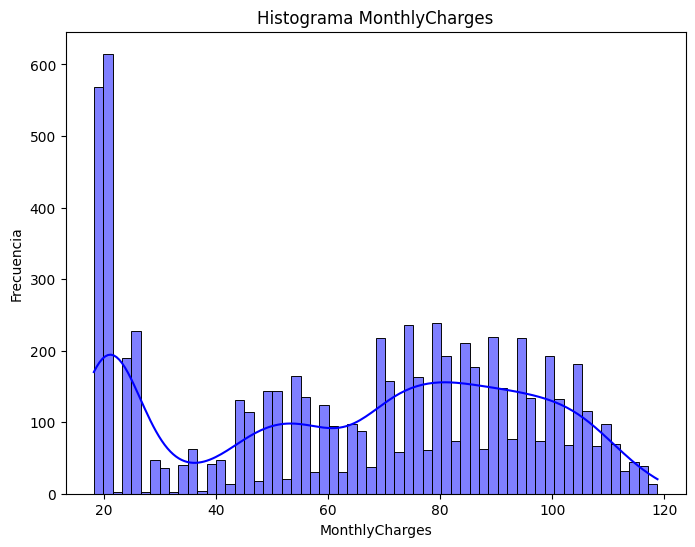

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data= data_inicial, x='MonthlyCharges', kde=True, color='blue', bins=60)
plt.title('Histograma MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

* Observación 10: sin outliers por criterio de distancia superior a 1,5 veces el rango inter cuartílico (RIQ).

### 3.6. RELACIONES ENTRE VARIABLES NUMÉRICAS

<Figure size 1000x400 with 0 Axes>

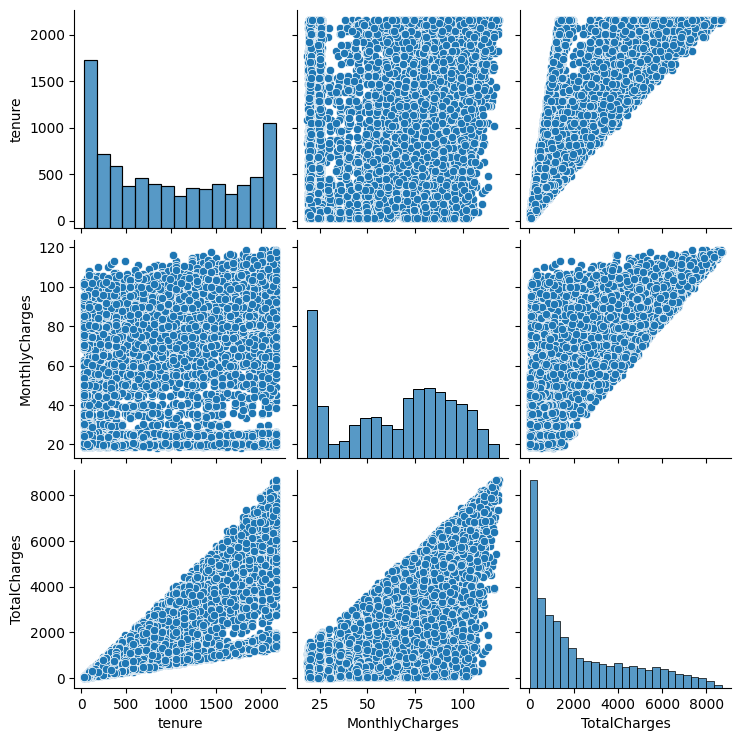

In [15]:
data_pairplot = data_inicial.loc[~(data_inicial['tenure']==0)][['tenure','MonthlyCharges','TotalCharges']]
data_pairplot['TotalCharges'] = data_pairplot['TotalCharges'].astype('float64')
plt.figure(figsize=(10, 4))
sns.pairplot(data_pairplot)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

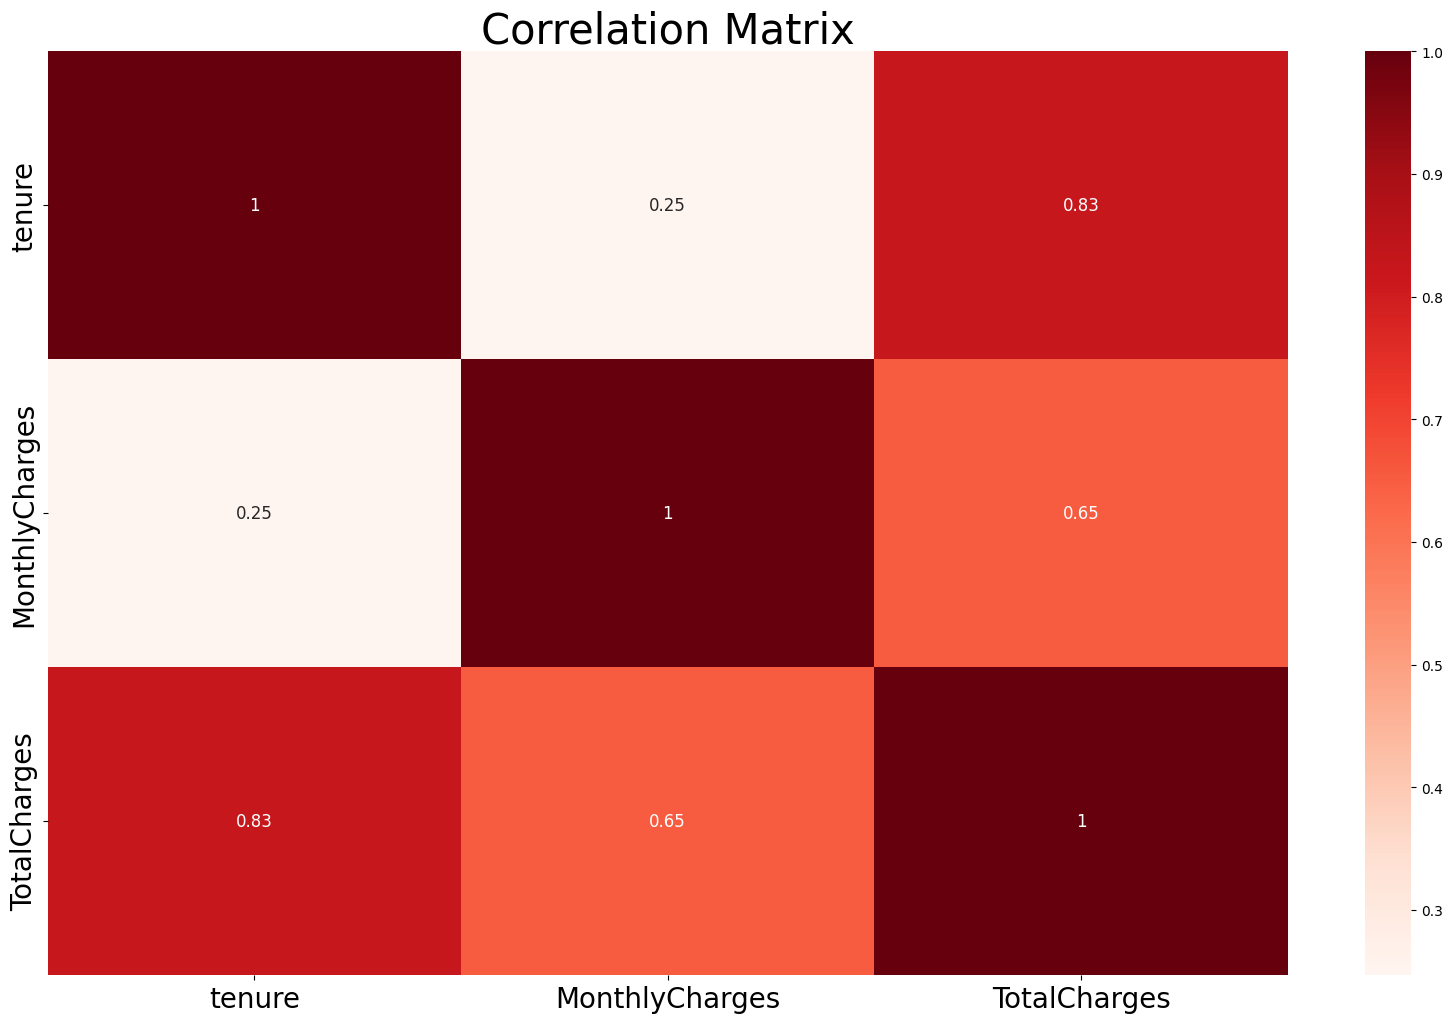

In [16]:
plt.figure(figsize=(20,12))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
X2_t_hm = pd.DataFrame(data_pairplot[['tenure', 'MonthlyCharges', 'TotalCharges']])
X2_t_hm.columns=['tenure', 'MonthlyCharges', 'TotalCharges']

sns.heatmap(X2_t_hm.corr().abs(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30)

* Observación 11: No se encuentran relaciones estrictamente lineales entre las variables numéricas no binarias. En particular entre las variables MonthlyCharges - tenure se observan registros dispersos en todo el cuadrante, entre MonthlyCharges - TotalCharges se encuentra que, mientras aumenta la carga mensual también aumenta el límite superior de la carga total cobrada a los respectivos consumidores, patrón que explica la correlación positiva, pero no fuerte entre estas variables, lo que al balancear por estrategias de muestras ficticias probablemente se vea afectado. Respecto de tenure - TotalCharges, se observa que a medida que aumentan los días como cliente aumenta el límite superior e inferior de la carga total cobrada a los respectivos consumidores, lo que es intuitivo y explica una fuerte correlación entre estas variables, lo que implicaría problemas de multicolinealidad en modelos donde interese la interpretabilidad de coeficientes.

### 3.7. VARIABLE Churn (Objetivo)

dimensiones de clase Yes: (1869, 21)
dimensiones de clase No: (5174, 21)
frecuencia relativa de clase Yes: 0.27
frecuencia relativa de clase No: 0.73


Text(1, 1869, '#: 1869 , f: 0.27')

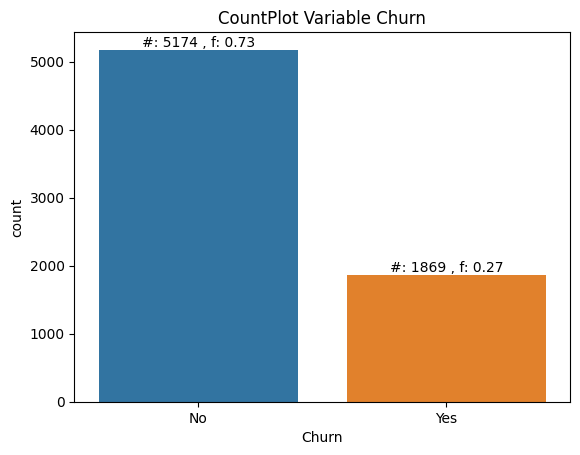

In [17]:
print('dimensiones de clase Yes:', data_inicial.loc[data_inicial['Churn'] == 'Yes'].shape)
print('dimensiones de clase No:', data_inicial.loc[data_inicial['Churn'] == 'No'].shape)
print('frecuencia relativa de clase Yes:', round(len(data_inicial.loc[data_inicial['Churn'] == 'Yes']['Churn'])/len(data_inicial['Churn']),2))
print('frecuencia relativa de clase No:', round(len(data_inicial.loc[data_inicial['Churn'] == 'No']['Churn'])/len(data_inicial['Churn']),2))

plt.title('CountPlot Variable Churn')
sns.countplot(data = data_inicial, x = 'Churn')

plt.text(0, len(data_inicial.loc[data_inicial['Churn'] == 'No']['Churn']), 
            '#: ' + str(len(data_inicial.loc[data_inicial['Churn'] == 'No']['Churn'])) + ' , ' + 
            'f: ' + str(round(len(data_inicial.loc[data_inicial['Churn'] == 'No']['Churn'])/len(data_inicial['Churn']),2)), 
            ha='center', va='bottom')

plt.text(1, len(data_inicial.loc[data_inicial['Churn'] == 'Yes']['Churn']), 
            '#: ' + str(len(data_inicial.loc[data_inicial['Churn'] == 'Yes']['Churn'])) + ' , ' + 
            'f: ' + str(round(len(data_inicial.loc[data_inicial['Churn'] == 'Yes']['Churn'])/len(data_inicial['Churn']),2)), 
            ha='center', va='bottom')

* Observación 12: existe un desbalanceo significativo en la variable objetivo, algo esperable en el contexto del problema de fuga. Se encuentra a la clase 'Yes' como minoritaria (clase positiva, de interés) y la clase 'No' como mayoritaria (clase negativa).

## 4. PREPROCESAMIENTO

### 4.1. IMPUTACIÓN DE DATOS

Respecto de los 11 registros con TotalCharges = ' ', considerando que:

* Para dichos registros tenure = 0, lo que podría explicarse en que corresponden a registros de clientes recientemente ingresados, menos de 1 día de permanencia, suponiendo que el valor 0 no es producto de un error. Otra opción es que sea un campo que tome valores luego de completar cada período mensual por regla de negocio, ya que el aumento en la distribución de la variable tenure es siempre 30 (30 días).
* El problema consiste en clasificación con variable objetivo a predecir tipo binaria, donde dicha variable toma los valores de la clase negativa (clase mayoritaria) en los 11 registros. En este contexto significaría que se etiquetaron como clientes que no se fugaron a clientes que llevan menos de un mes con contrato, lo que podría afectar el desempeño del modelo al considerar los valores de las variables en estos registros como valores posibles para clientes que no se fugarían.
* 11 registros sobre un total de 7043 representa un 0,16% y 11 sobre un total de 5174 (la clase a la que pertenecen) representa un 0,21%.

Se determina la eliminación de los 11 registros considerando que pueden corresponder a clientes recientemente ingresados, que pueden afectar el desempeño del modelo y que su eliminación lo más probable es que no tenga efectos significativos en pérdida de información ya que corresponden a un porcentaje muy bajo respecto del total de registros y del total de registros de la clase negativa.

In [18]:
data_pp = data_inicial.loc[data_inicial['TotalCharges'] != ' ']
data_pp.shape

(7032, 21)

### 4.2. CAMBIO TIPO DE DATO

In [19]:
data_pp['TotalCharges'] = data_pp['TotalCharges'].astype('float64')
data_pp['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


C:\Users\djara\AppData\Local\Temp\ipykernel_556\2063630124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pp['TotalCharges'] = data_pp['TotalCharges'].astype('float64')


### 4.3. TRANSFORMACIONES

#### 4.3.1. ELIMINACIÓN VARIABLE PK

In [20]:
data_pp.drop('customerID', axis=1, inplace=True)
print(data_pp.shape)

(7032, 20)


C:\Users\djara\AppData\Local\Temp\ipykernel_556\3536304534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pp.drop('customerID', axis=1, inplace=True)


#### 4.3.2. RECATEGORIZACIÓN DE VARIABLES MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport	StreamingTV y StreamingMovies.


BASADO EN OBSERVACIÓN 5:

La información de registros con "No phone service" en la variable MultipleLines, la captura la variable PhoneService en su valor "No". La información de "No internet service", en las variables de productos online, la captura la variable InternetService en su valor "No".

In [22]:
data_pp['MultipleLines'] = data_pp['MultipleLines'].replace('No phone service','No')
data_pp['OnlineSecurity'] = data_pp['OnlineSecurity'].replace('No internet service','No')
data_pp['OnlineBackup'] = data_pp['OnlineBackup'].replace('No internet service','No')
data_pp['DeviceProtection'] = data_pp['DeviceProtection'].replace('No internet service','No')
data_pp['TechSupport'] = data_pp['TechSupport'].replace('No internet service','No')
data_pp['StreamingTV'] = data_pp['StreamingTV'].replace('No internet service','No')
data_pp['StreamingMovies'] = data_pp['StreamingMovies'].replace('No internet service','No')

#### 4.3.3. TRANSFORMACIÓN CATEGÓRICAS A NUMÉRICAS

In [23]:
data_pp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,30,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,1020,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,60,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,1350,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,60,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,720,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,2160,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,330,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,120,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
col_cat = data_pp.select_dtypes(include = 'object').columns
col_cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

* Observación 13:

    * binarias: 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'

    * categoricas nominales: 'InternetService', 'PaymentMethod'

    * categóricas ordinales: 'Contract'

In [25]:
transform_cat = make_column_transformer((OneHotEncoder(),
                                        ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                         'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                                         'PaymentMethod']))
data_pp_cat = pd.DataFrame(transform_cat.fit_transform(data_pp), columns = transform_cat.get_feature_names_out())
data_pp_cat.index = data_pp.index

In [26]:
columns_drop = ['onehotencoder__gender_Male', 'onehotencoder__Partner_No', 'onehotencoder__Dependents_No', 
                'onehotencoder__PhoneService_No', 'onehotencoder__MultipleLines_No', 'onehotencoder__OnlineSecurity_No',
                'onehotencoder__OnlineBackup_No', 'onehotencoder__DeviceProtection_No', 'onehotencoder__TechSupport_No',
                'onehotencoder__StreamingTV_No', 'onehotencoder__StreamingMovies_No', 'onehotencoder__PaperlessBilling_No',
                'onehotencoder__InternetService_No', 'onehotencoder__PaymentMethod_Mailed check']
data_pp_cat.drop(columns = columns_drop, axis = 1, inplace = True) 

In [27]:
data_pp_cat = data_pp_cat.astype('int64')
data_pp_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   onehotencoder__gender_Female                            7032 non-null   int64
 1   onehotencoder__Partner_Yes                              7032 non-null   int64
 2   onehotencoder__Dependents_Yes                           7032 non-null   int64
 3   onehotencoder__PhoneService_Yes                         7032 non-null   int64
 4   onehotencoder__MultipleLines_Yes                        7032 non-null   int64
 5   onehotencoder__InternetService_DSL                      7032 non-null   int64
 6   onehotencoder__InternetService_Fiber optic              7032 non-null   int64
 7   onehotencoder__OnlineSecurity_Yes                       7032 non-null   int64
 8   onehotencoder__OnlineBackup_Yes                         70

In [28]:
data_pp = data_pp.join(data_pp_cat)
data_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   gender                                                  7032 non-null   object 
 1   SeniorCitizen                                           7032 non-null   int64  
 2   Partner                                                 7032 non-null   object 
 3   Dependents                                              7032 non-null   object 
 4   tenure                                                  7032 non-null   int64  
 5   PhoneService                                            7032 non-null   object 
 6   MultipleLines                                           7032 non-null   object 
 7   InternetService                                         7032 non-null   object 
 8   OnlineSecurity                        

In [29]:
data_pp['Contract'] = data_pp['Contract'].map({'Month-to-month':1, 'One year':12, 'Two year':24})
data_pp['Churn'] = data_pp['Churn'].map({'Yes':1, 'No':0})

In [30]:
columns_drop2 = [   'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

data_pp.drop(columns = columns_drop2, axis = 1, inplace = True) 

## 5. Modelamiento

### 5.1. SEPARACIÓN DE REGISTROS DE ENTRENAMIENTO Y TESTEO

In [31]:
Y = data_pp['Churn']
X = data_pp.drop(columns=['Churn'])

In [32]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5625, 22)
(1407, 22)


### 5.2. BALANCE POR ESTRATEGIA DE MUESTRAS FICTICIAS SMOTEENN (SUB Y SOBRE MUESTREO) POR CLASES DESBALANCEADAS EN VARIABLE Churn (OBJETIVO)

In [33]:
Y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 6030 to 862
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SeniorCitizen                                           5625 non-null   int64  
 1   tenure                                                  5625 non-null   int64  
 2   Contract                                                5625 non-null   int64  
 3   MonthlyCharges                                          5625 non-null   float64
 4   TotalCharges                                            5625 non-null   float64
 5   onehotencoder__gender_Female                            5625 non-null   int64  
 6   onehotencoder__Partner_Yes                              5625 non-null   int64  
 7   onehotencoder__Dependents_Yes                           5625 non-null   int64  
 8   onehotencoder__PhoneService_Yes     

In [35]:
X_train_s , Y_train_s = SMOTEENN(random_state = 42).fit_resample(X_train, Y_train)
print(X_train_s.shape)
print(Y_train_s.shape)
print(Y_train_s.value_counts())

(4721, 22)
(4721,)
1    2494
0    2227
Name: Churn, dtype: int64


### 5.3. ESTADARIZACIÓN X_train_s y X_test

In [36]:
scaler = StandardScaler()

X_train_s_st = pd.DataFrame(scaler.fit_transform(X_train_s[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]))
X_train_s_st = pd.concat([X_train_s, X_train_s_st], axis = 1)
X_train_s_st.drop(columns=['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)
X_train_s_st = X_train_s_st.rename(columns= {0:'tenure', 1:'Contract', 2:'MonthlyCharges', 3:'TotalCharges'})

X_test_st = pd.DataFrame(scaler.transform(X_test[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]))
X_test_st.index = X_test.index
X_test_st = pd.concat([X_test, X_test_st], axis = 1)
X_test_st.drop(columns=['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)
X_test_st = X_test_st.rename(columns= {0:'tenure', 1:'Contract', 2:'MonthlyCharges', 3:'TotalCharges'})

### 5.4. RELACIÓN ENTRE VARIABLES NUMÉRICAS LUEGO DE TRANSFORMACIONES, BALANCEO Y ESTANDARIZACIÓN

Text(0.5, 1.0, 'Correlation Matrix')

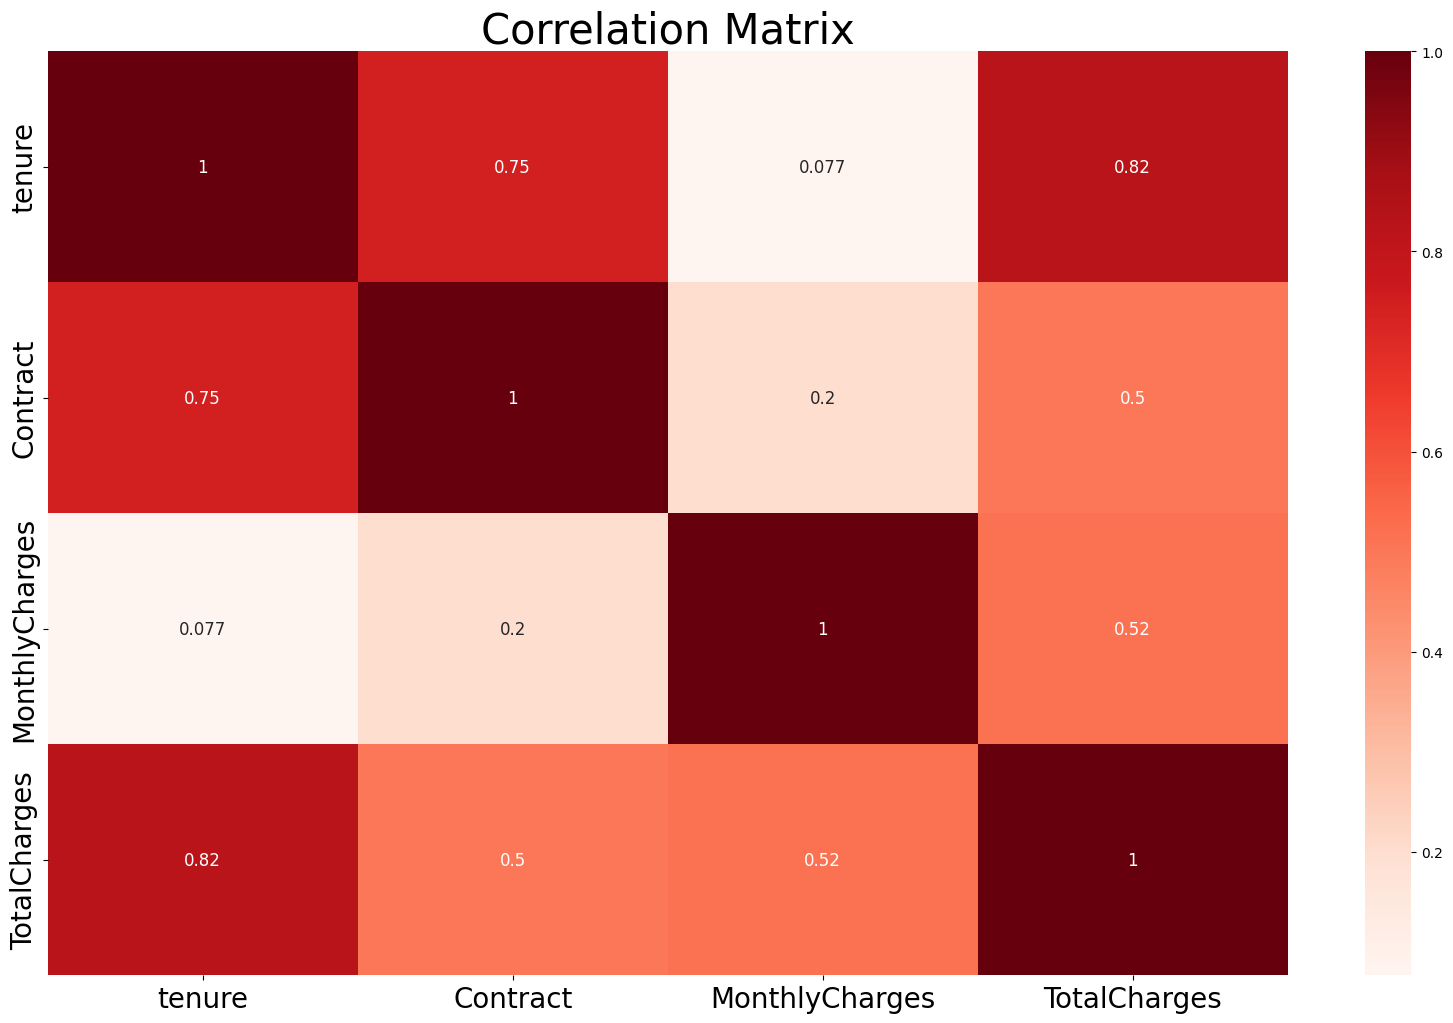

In [37]:
plt.figure(figsize=(20,12))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
X2_t_hm = pd.DataFrame(X_train_s_st[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']])
X2_t_hm.columns=['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']

sns.heatmap(X2_t_hm.corr().abs(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30)

* Observación 14: Alta correlación entre variable tenure y variable TotalCharges y menos fuerte con Contract (pero contract no es una variable numérica continua es una transformación numérica discreta que captura el caracter ordinal de la variables categórica ordinal contract original). Para interpretar en modelos lineales se deberá tener presente el problema de multicolinealidad que implica la alta correlación mencionada.

### 5.5. CONSTRUCCION DE MODELOS

#### 5.5.1. Logistic Regression

In [38]:
model_lr = linear_model.LogisticRegression(max_iter=100000, random_state=42)
params = {'C':[0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']}
grid_lr = model_selection.GridSearchCV(estimator = model_lr, param_grid = params, cv = 10, scoring = 'recall')
grid_lr.fit(X_train_s_st, Y_train_s)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             scoring='recall')

In [39]:
grid_lr.best_estimator_.coef_

array([[-0.08216085, -0.26468384, -0.28754464, -0.48453218, -0.33965457,
        -0.13796098, -0.06997291,  0.54238996, -0.42485391, -0.35500825,
        -0.29820243, -0.42327776, -0.01473643,  0.13899232,  0.09621929,
        -0.41147204, -0.39678769,  0.03303814, -0.92430912, -0.7747778 ,
         1.17107449, -0.21125877]])

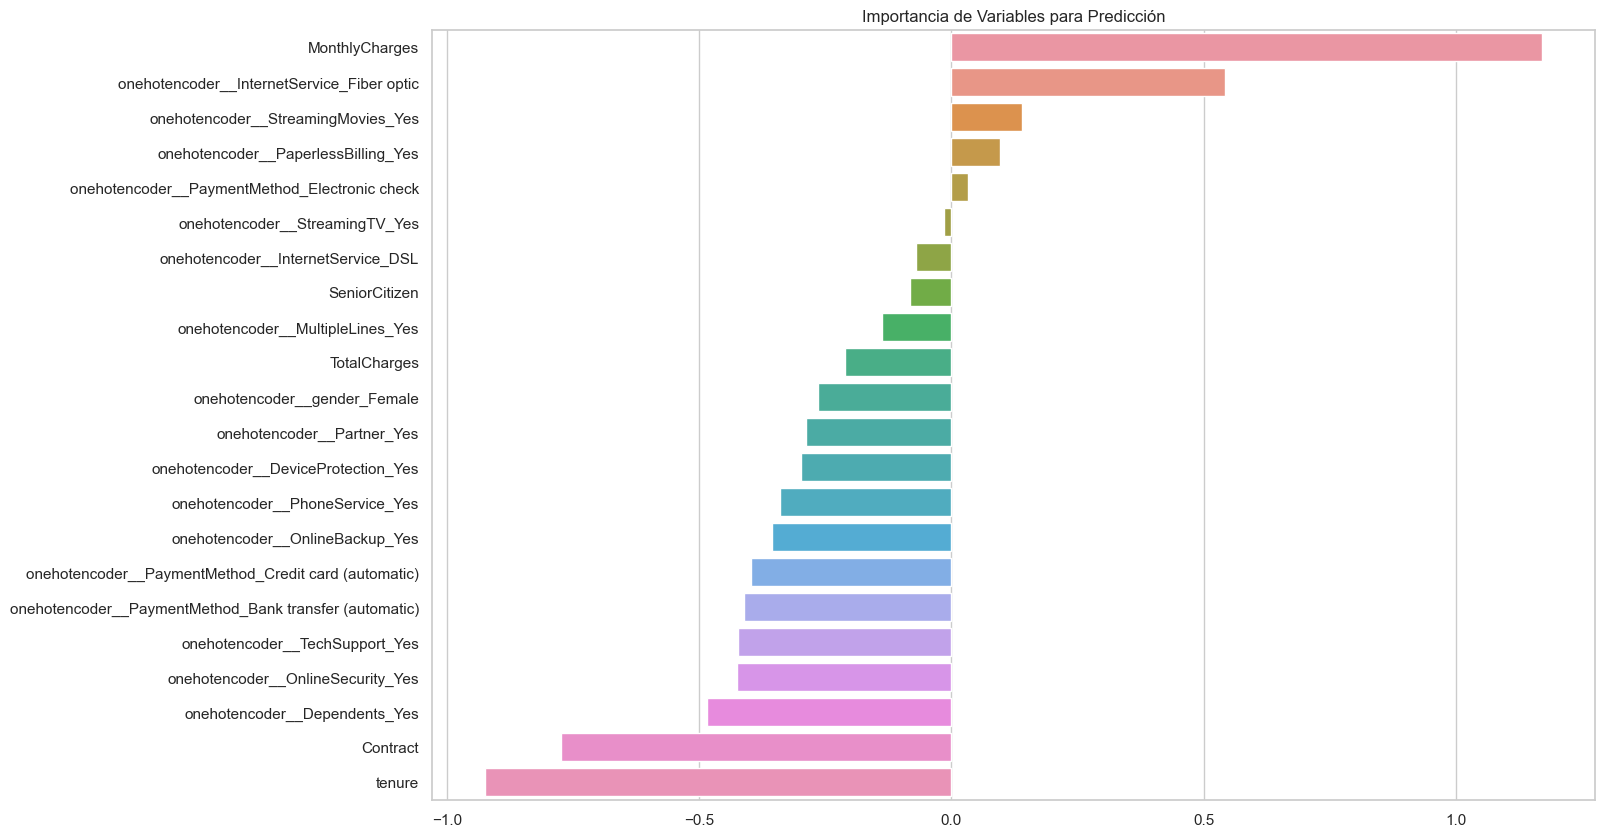

In [40]:
info = pd.Series(data = grid_lr.best_estimator_.coef_[0], index = X_train_s_st.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Importancia de Variables para Predicción')
plt.show()

In [41]:
print(metrics.classification_report(Y_train_s, grid_lr.predict(X_train_s_st)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2227
           1       0.90      0.94      0.92      2494

    accuracy                           0.91      4721
   macro avg       0.91      0.91      0.91      4721
weighted avg       0.91      0.91      0.91      4721



In [42]:
print(metrics.classification_report(Y_test, grid_lr.predict(X_test_st)))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407



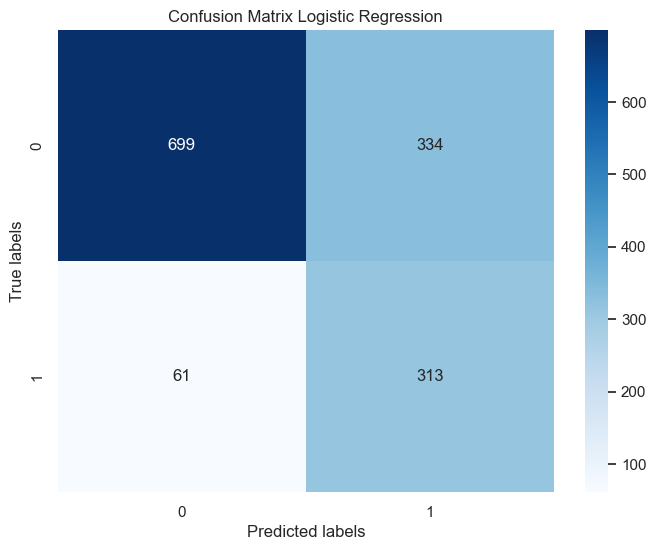

In [77]:
cm = metrics.confusion_matrix(Y_test, grid_lr.predict(X_test_st))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

#### 5.5.2. Random Forest

In [44]:
model_rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
params = {'max_depth':[3,5, 8, 10], 'max_features': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0]}
grid_rf = model_selection.GridSearchCV(estimator = model_rf, param_grid = params, cv = 10, scoring = 'recall')
grid_rf.fit(X_train_s_st, Y_train_s)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0]},
             scoring='recall')

In [45]:
grid_rf.best_estimator_.feature_importances_

array([0.00248997, 0.00461505, 0.00407526, 0.01379166, 0.00515508,
       0.00417924, 0.01263698, 0.0446197 , 0.00796503, 0.00847862,
       0.00504672, 0.0047054 , 0.00304495, 0.00292208, 0.00362657,
       0.00592635, 0.00620886, 0.00278636, 0.18633098, 0.47024134,
       0.11965358, 0.08150023])

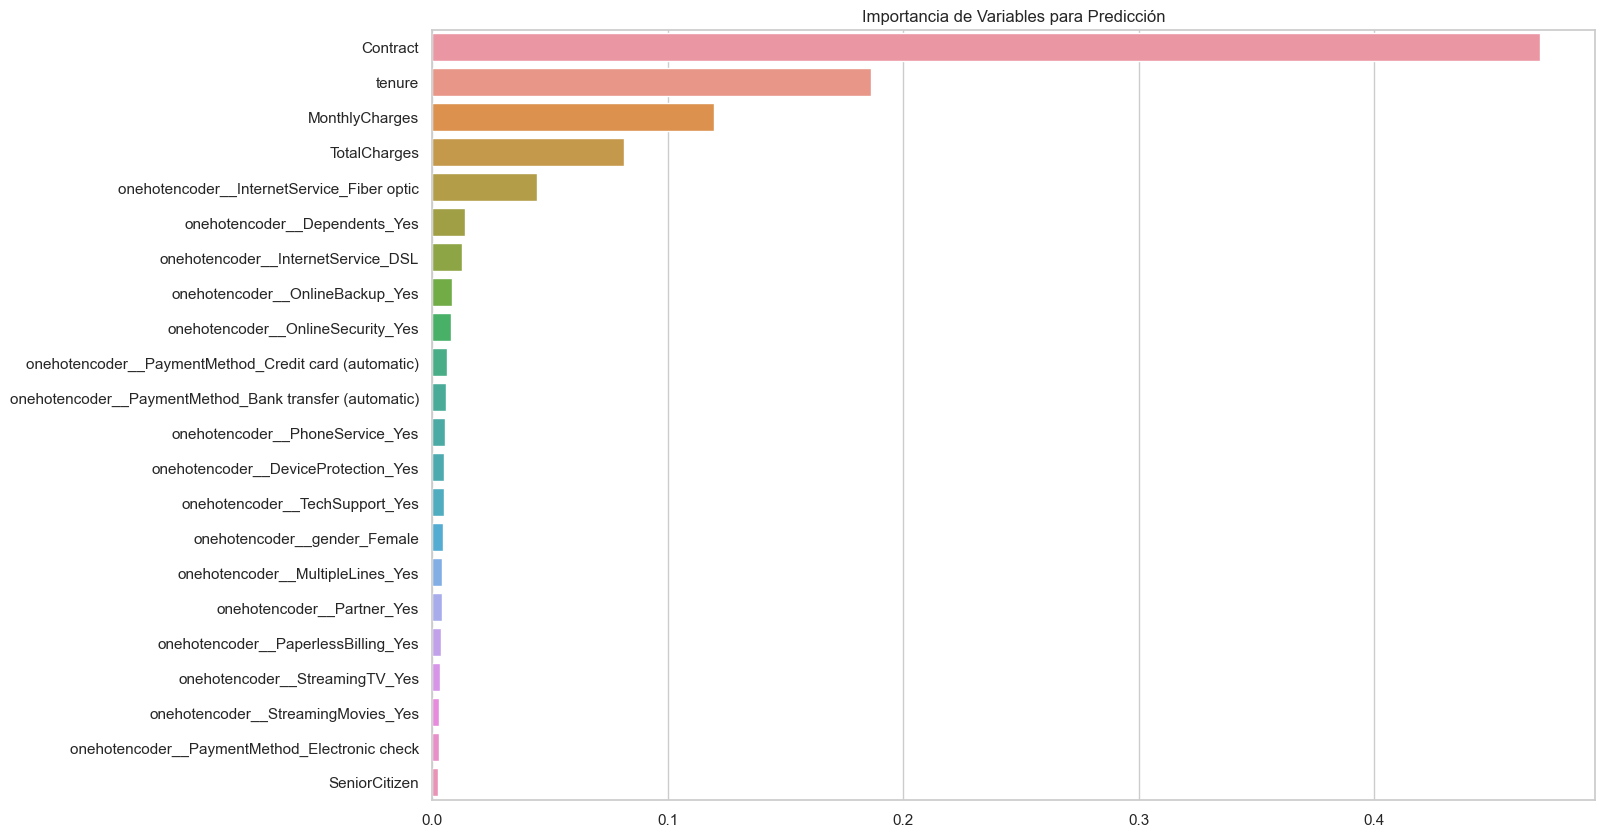

In [46]:
info = pd.Series(data = grid_rf.best_estimator_.feature_importances_, index = X_train_s_st.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Importancia de Variables para Predicción')
plt.show()

In [47]:
print(metrics.classification_report(Y_train_s, grid_rf.predict(X_train_s_st)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2227
           1       0.99      0.99      0.99      2494

    accuracy                           0.99      4721
   macro avg       0.99      0.99      0.99      4721
weighted avg       0.99      0.99      0.99      4721



In [48]:
print(metrics.classification_report(Y_test, grid_rf.predict(X_test_st)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.81      1033
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407



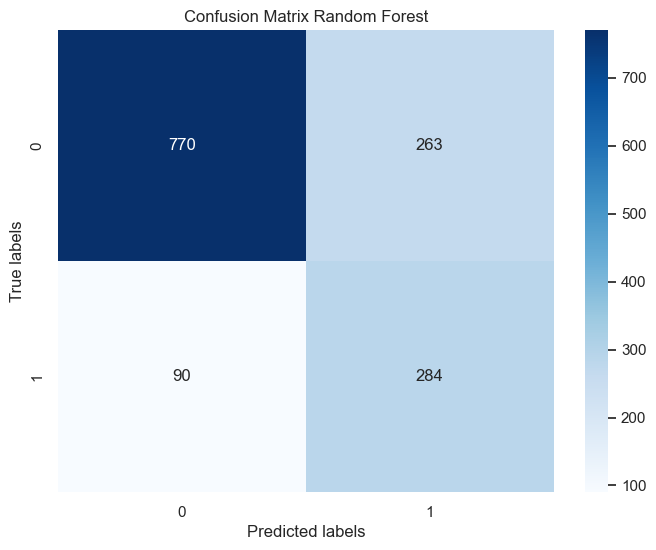

In [78]:
cm = metrics.confusion_matrix(Y_test, grid_rf.predict(X_test_st))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

#### 5.5.3. XGBoost

In [50]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
params = {'max_depth':[3, 5, 8, 10], 'colsample_bytree': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0]}
grid_xgb = model_selection.GridSearchCV(estimator = model_xgb, param_grid = params, cv = 10, scoring = 'recall')
grid_xgb.fit(X_train_s_st, Y_train_s)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0],
                         'max_depth': [3, 5, 8, 10]},
             scoring='recall')

In [51]:
grid_xgb.best_estimator_.feature_importances_

array([0.00454148, 0.00748772, 0.06055328, 0.08121312, 0.0252595 ,
       0.00869787, 0.02057049, 0.39496392, 0.0220164 , 0.00818217,
       0.0276392 , 0.03080919, 0.00657157, 0.01992703, 0.00650246,
       0.03931943, 0.06959984, 0.00944957, 0.04372542, 0.06942513,
       0.01846881, 0.0250764 ], dtype=float32)

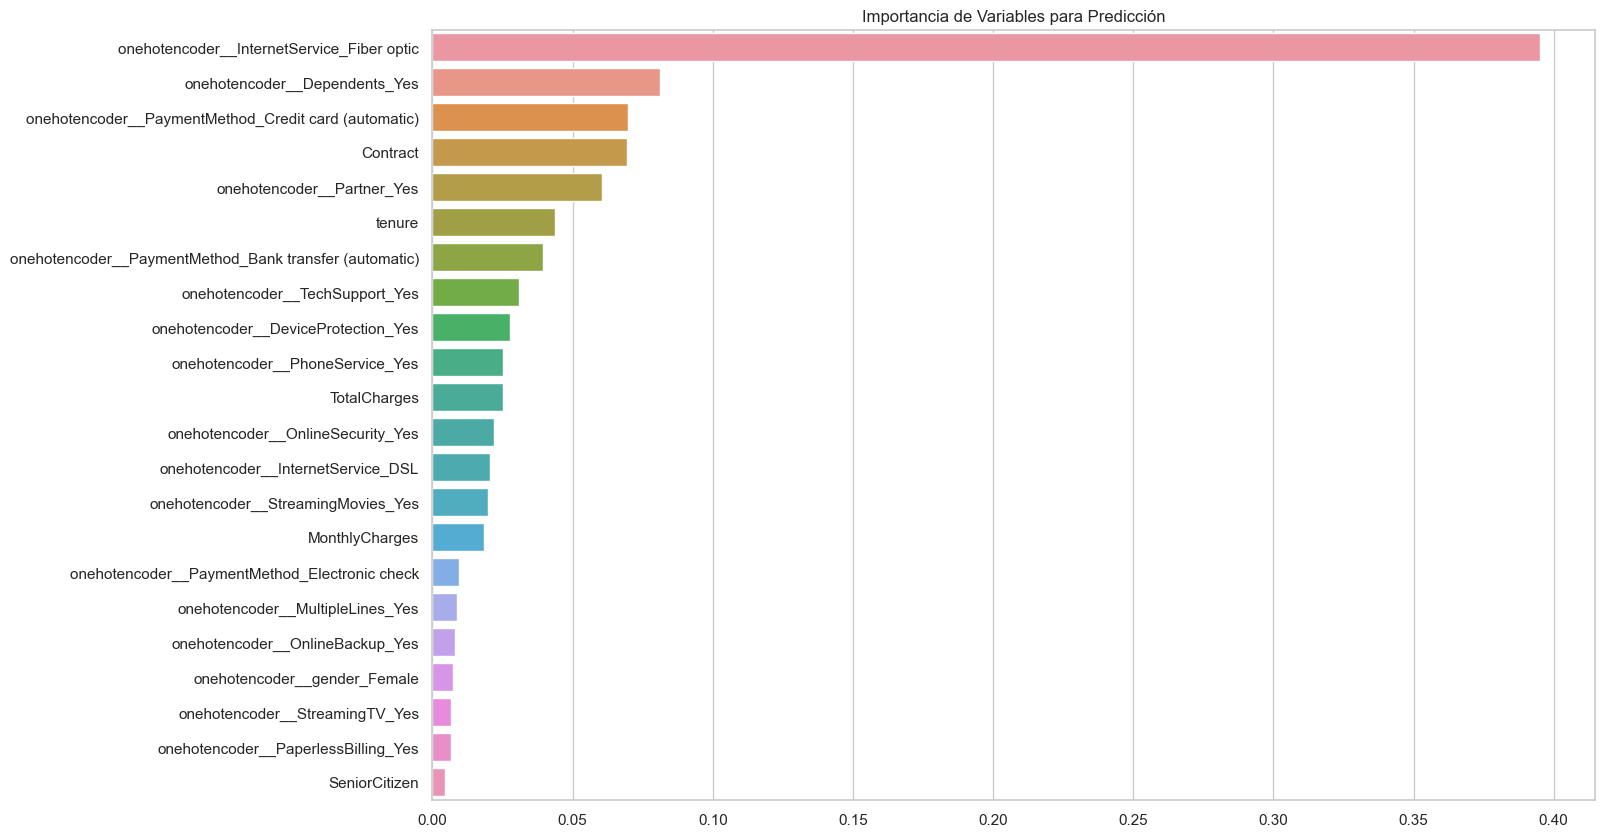

In [52]:
info = pd.Series(data = grid_xgb.best_estimator_.feature_importances_, index = X_train_s_st.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Importancia de Variables para Predicción')
plt.show()

In [53]:
print(metrics.classification_report(Y_train_s, grid_xgb.predict(X_train_s_st)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2227
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      4721
   macro avg       1.00      1.00      1.00      4721
weighted avg       1.00      1.00      1.00      4721



In [54]:
print(metrics.classification_report(Y_test, grid_xgb.predict(X_test_st)))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.74      0.75      1407



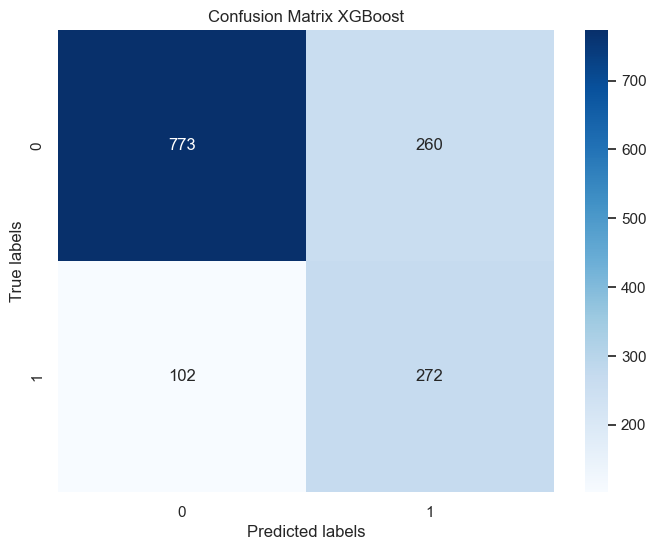

In [79]:
cm = metrics.confusion_matrix(Y_test, grid_xgb.predict(X_test_st))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.show()

#### 5.5.4. Gradient Boosting Classifier

In [56]:
model_gb = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=42)
params = {'max_depth':[3,5, 8, 10], 'max_features': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0]}
grid_gb = model_selection.GridSearchCV(estimator = model_gb, param_grid = params, cv = 10, scoring = 'recall')
grid_gb.fit(X_train_s_st, Y_train_s)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': [0.2, 0.4, 0.5, 0.7, 0.9, 1.0]},
             scoring='recall')

In [57]:
grid_gb.best_estimator_.feature_importances_

array([0.0027722 , 0.00513075, 0.00494321, 0.01602539, 0.00576915,
       0.00533735, 0.01486495, 0.08453016, 0.00665539, 0.00904902,
       0.00647443, 0.00574663, 0.00375988, 0.00415468, 0.00508647,
       0.00952127, 0.00692258, 0.00355299, 0.19199558, 0.44008433,
       0.07636932, 0.09125428])

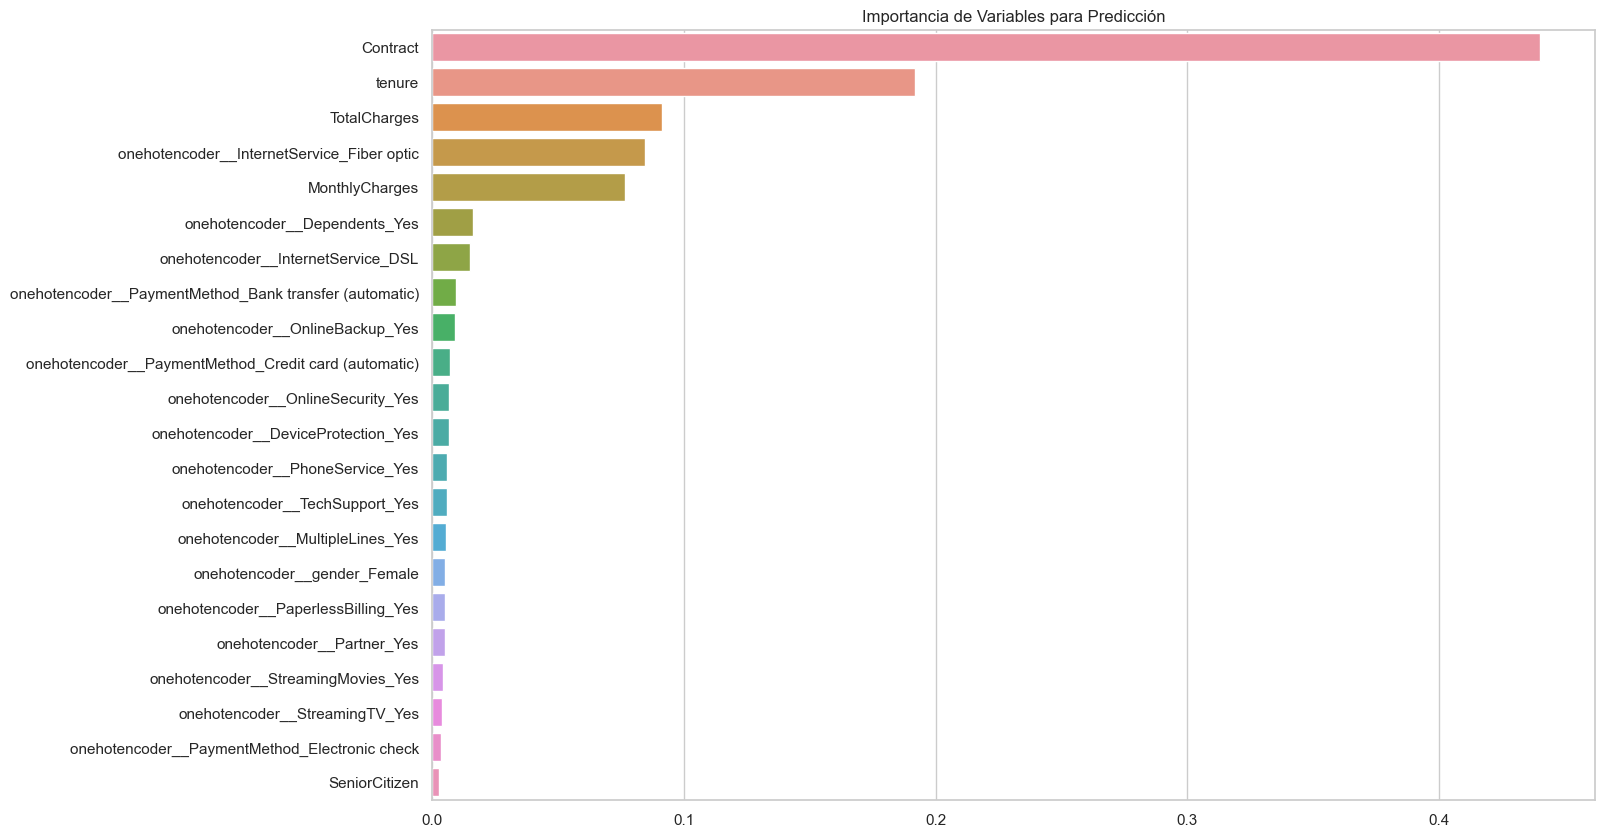

In [58]:
info = pd.Series(data = grid_gb.best_estimator_.feature_importances_, index = X_train_s_st.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Importancia de Variables para Predicción')
plt.show()

In [59]:
print(metrics.classification_report(Y_train_s, grid_gb.predict(X_train_s_st)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2227
           1       1.00      1.00      1.00      2494

    accuracy                           1.00      4721
   macro avg       1.00      1.00      1.00      4721
weighted avg       1.00      1.00      1.00      4721



In [60]:
print(metrics.classification_report(Y_test, grid_gb.predict(X_test_st)))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



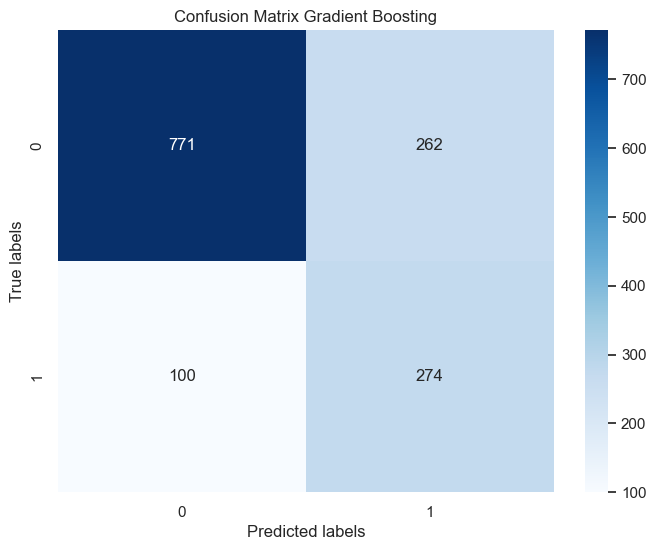

In [80]:
cm = metrics.confusion_matrix(Y_test, grid_gb.predict(X_test_st))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Gradient Boosting')
plt.show()

## 6. RESUMEN Y SELECCIÓN DE MODELO

Se selecciona el modelo de regresión logística en base a criterio de métrica recall, priorizando el maximizar los verdaderos positivos respecto de los positivos reales, en detrimento de la precisión, suponiendo que es más riesgoso para la empresa el equivocarse prediciendo que un cliente no se fugará cuando realmente sí lo hará, que el equivocarse prediciendo que un cliente se fugará cuando realmente no lo hará. Para seguir robusteciendo este análisis es posible profundizar en técnicas de analítica prescriptiva, incorporando al análisis variables de costo en el contexto del problema, contrastando el costo de la fuga de un cliente con el costo de contacto y acciones que se decidan tomar para mitigar el riesgo de fuga en los clientes que el modelo predice que se fugarán. Junto con lo anterior, para la planificación del uplift se pueden tener en consideración las probabilidades de fuga que arroja el modelo para cada respectivo cliente, donde se puede establecer un umbral que permita determinar "clientes causas perdidas" quienes, consecuentemente, presentarán una alta probabilidad de fuga, entendida como una probabilidad sobre el umbral determinado, quienes podrían requerir mayores esfuerzos que otros grupos de clientes y a pesar de ello fugarse. Además, se pueden tener en consideración otras segmentaciones de clientes en base a las probabilidades que arroja el modelo y las características que se puedan recabar de cada cliente.

Adicionalmente, a continuación, se desarrolla un modelo de regresión logística con mayor grado de interpretabilidad, este último se obtiene al corregir el problema de multicolinealidad entre variables numéricas, lo que permite tener una mayor capacidad de interpretar correctamente los coeficientes de las variables. Lo anterior es posible de conseguir quitando la variable "tenure",sacrificando 4% de recall, es decir, la relación entre clientes que el modelo predice que se fugarían respecto del total de clientes que realmente se fugarían se ve afectada negativamente en el contexto de este problema prediciendo correctamente este tipo de casos (clientes que realmente se fugarían) con un 4% menos de efectividad. También es posible eliminar la variable "TotalCharges" lo que para efectos de este problema no genera un detrimento en la métrica utilizada para seleccionar el modelo (recall), y además, el mantener la variable tenure en el modelo permite una interpretación más directa (días de permanencia del cliente), por lo que se opta por esta segunda alternativa de eliminación de multicolinealidad fuerte. Cabe mencionar que se observa correlación entre tenure y contract, pero cabe recordar que en contract se realiza una transformación a variable numérica que captura el caracter ordinal de la variable categórica ordinal contract original, por lo que no es una relación entre variables numéricas continuas. 

Sumado a lo anterior se procederá a la eliminar variables no significativas al 95% de confianza (en base a un análisis de significancia de explicabilidad en modelo de regresión logística de estadística clásica), manteniendo algunas de estas (no significativas) en coherencia con los resultados de importancia de de caracteríscas para los modelos predictivos y el contexto del problema (alcance de acciones de la empresa), equilibrando el resultado entre relevancia predictiva y grado de interpretabilidad de los coeficientes que el modelo le asigna a las variables.

Finalmente, cabe mencionar ambos modelos regresión logística y regresión logística ajustada (mayor grado de interpretabilidad), deben ser entendido y utilizados para fines relacionados, pero distintos, donde el primer modelo tiene el objetivo de predecir y por lo tanto, probablemente generalice mejor que el segundo cuando reciba nuevos datos posterior al testo de este trabajo y el segundo modelo tiene el objetivo de aumentar el grado de interpretabilidad de los coeficientes de las variables que utiliza el modelo. El fin de desarrollar ambos modelos es usarlos de manera complementaria como apoyo al análisis y propuestas.

### 6.1. Regresión Logística Interpretable (Predicción con Mayor Grado Interpretabilidad)

In [62]:
X_train_lri = X_train_s_st.drop(columns='TotalCharges')
Y_train_lri = Y_train_s
X_test_lri = X_test_st.drop(columns='TotalCharges')
Y_test_lri = Y_test

In [63]:
model_lri = linear_model.LogisticRegression(max_iter=100000)
params = {'C':[0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']}
grid_lri = model_selection.GridSearchCV(estimator = model_lri, param_grid = params, cv = 10, scoring = 'recall')
grid_lri.fit(X_train_lri, Y_train_lri)
grid_lri.best_estimator_.coef_

array([[-0.08346408, -0.26095133, -0.2960024 , -0.47991044, -0.34049356,
        -0.1596688 , -0.05595749,  0.52470008, -0.4361982 , -0.37454857,
        -0.31579951, -0.43417389, -0.03667328,  0.11801275,  0.09188287,
        -0.41146558, -0.39971057,  0.0379323 , -1.04170546, -0.79848542,
         1.12065386]])

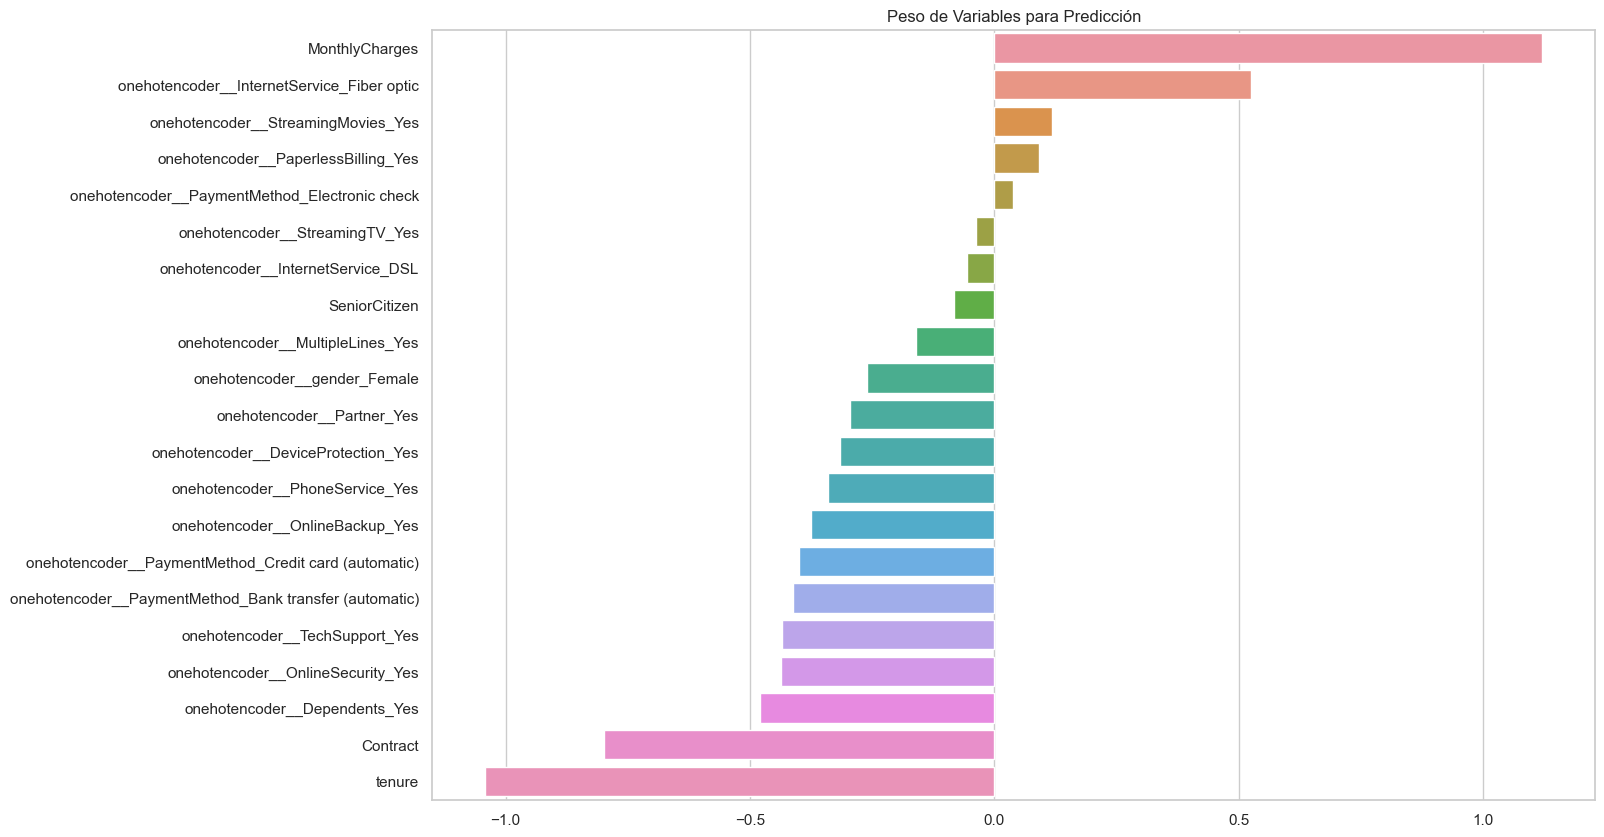

In [64]:
info = pd.Series(data = grid_lri.best_estimator_.coef_[0], index = X_train_lri.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Peso de Variables para Predicción')
plt.show()

In [65]:
print('Métricas en Entrenamiento')
print(metrics.classification_report(Y_train_lri, grid_lri.predict(X_train_lri)))
print('Métricas en Testeo')
print(metrics.classification_report(Y_test_lri, grid_lri.predict(X_test_lri)))

Métricas en Entrenamiento
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2227
           1       0.90      0.94      0.92      2494

    accuracy                           0.91      4721
   macro avg       0.91      0.91      0.91      4721
weighted avg       0.91      0.91      0.91      4721

Métricas en Testeo
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1033
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.69      1407
weighted avg       0.80      0.72      0.73      1407



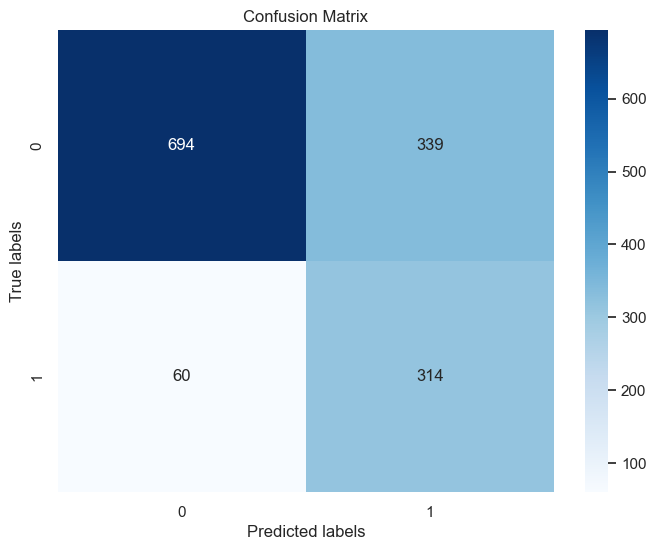

In [66]:
cm = metrics.confusion_matrix(Y_test_lri, grid_lri.predict(X_test_lri))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 6.2. Regresión Logística Estadística Clásica (Apoyo a la Interpretabilidad)

In [67]:
X_st = pd.DataFrame(scaler.transform(X[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]))
X_st.index = X.index
X_st = pd.concat([X, X_st], axis = 1)
X_st.drop(columns=['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)
X_st = X_st.rename(columns= {0:'tenure', 1:'Contract', 2:'MonthlyCharges', 3:'TotalCharges'})
X_st_stat = X_st.drop(columns='TotalCharges')

In [68]:
X_st_stat_intercept = sm.add_constant(X_st_stat)
logit_model = sm.Logit(Y, X_st_stat_intercept)
res = logit_model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.415893
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7010
Method:                           MLE   Df Model:                           21
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.2817
Time:                        17:12:58   Log-Likelihood:                -2924.6
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const               

Variables con valor p < 0.05 (significantes al 95% de confianza): SeniorCitizen, onehotencoder__MultipleLines_Yes, onehotencoder__InternetService_DSL, onehotencoder__InternetService_Fiber optic, onehotencoder__PaperlessBilling_Yes, onehotencoder__PaymentMethod_Electronic check, tenure, Contract.

Además se mantienen las variables onehotencoder__OnlineSecurity_Yes, onehotencoder__TechSupport_Yes y MonthlyCharges, relevantes en el modelo predictivo y con menor valor p de entre aquellas no significativas al 95% de confianza.

In [69]:
X_st_stat2 = X_st_stat[['SeniorCitizen', 'onehotencoder__MultipleLines_Yes', 'onehotencoder__InternetService_DSL', 
                                'onehotencoder__InternetService_Fiber optic', 'onehotencoder__PaperlessBilling_Yes', 
                                'onehotencoder__PaymentMethod_Electronic check', 'tenure', 'Contract',
                                'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__TechSupport_Yes', 'MonthlyCharges']]

X_st_stat_intercept2 = sm.add_constant(X_st_stat2)
logit_model = sm.Logit(Y, X_st_stat_intercept2)
res2 = logit_model.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.419935
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7020
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.2748
Time:                        17:12:58   Log-Likelihood:                -2953.0
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

Todas las variables aportadas son significativas al 95% de confianza

### 6.3. Regresión Logística Interpretable (Modelo Predictivo con Ajustes de Modelo de Estadística Clásica)

In [70]:
X_train_lri2 = X_train_s_st[['SeniorCitizen', 'onehotencoder__MultipleLines_Yes', 'onehotencoder__InternetService_DSL', 
                                'onehotencoder__InternetService_Fiber optic', 'onehotencoder__PaperlessBilling_Yes', 
                                'onehotencoder__PaymentMethod_Electronic check', 'tenure', 'Contract',
                                'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__TechSupport_Yes', 'MonthlyCharges']]
Y_train_lri2 = Y_train_s
X_test_lri2 = X_test_st[['SeniorCitizen', 'onehotencoder__MultipleLines_Yes', 'onehotencoder__InternetService_DSL', 
                                'onehotencoder__InternetService_Fiber optic', 'onehotencoder__PaperlessBilling_Yes', 
                                'onehotencoder__PaymentMethod_Electronic check', 'tenure', 'Contract',
                                'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__TechSupport_Yes', 'MonthlyCharges']]
Y_test_lri2 = Y_test

In [71]:
model_lri2 = linear_model.LogisticRegression(max_iter=100000)
params = {'C':[0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']}
grid_lri2 = model_selection.GridSearchCV(estimator = model_lri, param_grid = params, cv = 10, scoring = 'recall')
grid_lri2.fit(X_train_lri2, Y_train_lri2)
grid_lri2.best_estimator_.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.48010681, -0.87513909, -0.08065916, -0.07308847,
         1.31908877]])

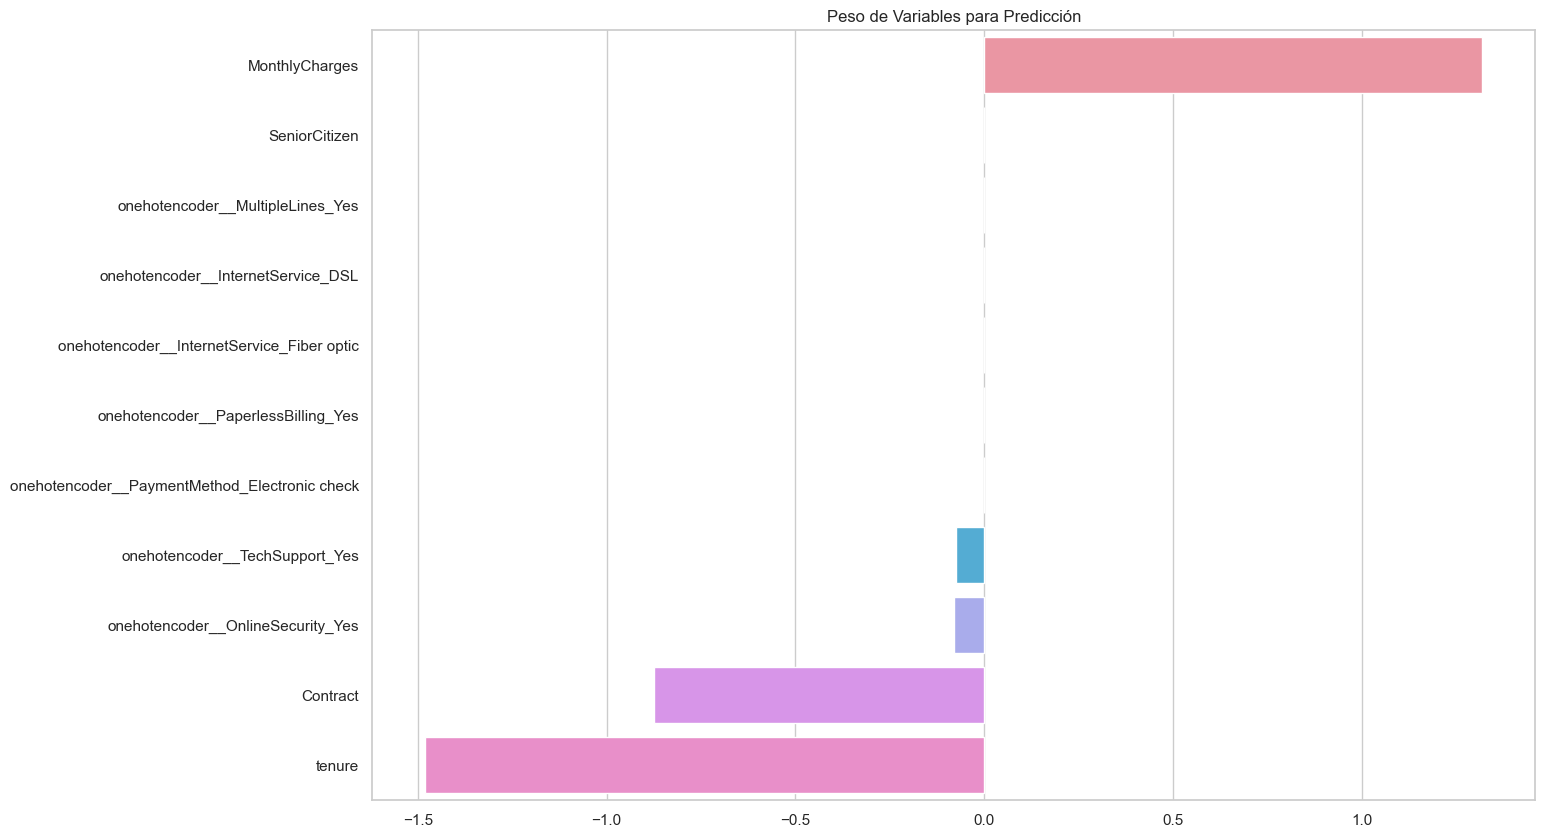

In [72]:
info = pd.Series(data = grid_lri2.best_estimator_.coef_[0], index = X_train_lri2.columns).sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')

ax = sns.barplot(y = info.index, x = info.values, orient = 'h')
plt.title('Peso de Variables para Predicción')
plt.show()

In [73]:
print('Métricas en Entrenamiento')
print(metrics.classification_report(Y_train_lri2, grid_lri2.predict(X_train_lri2)))
print('Métricas en Testeo')
print(metrics.classification_report(Y_test_lri2, grid_lri2.predict(X_test_lri2)))

Métricas en Entrenamiento
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2227
           1       0.87      0.93      0.90      2494

    accuracy                           0.89      4721
   macro avg       0.89      0.89      0.89      4721
weighted avg       0.89      0.89      0.89      4721

Métricas en Testeo
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1033
           1       0.45      0.86      0.59       374

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407



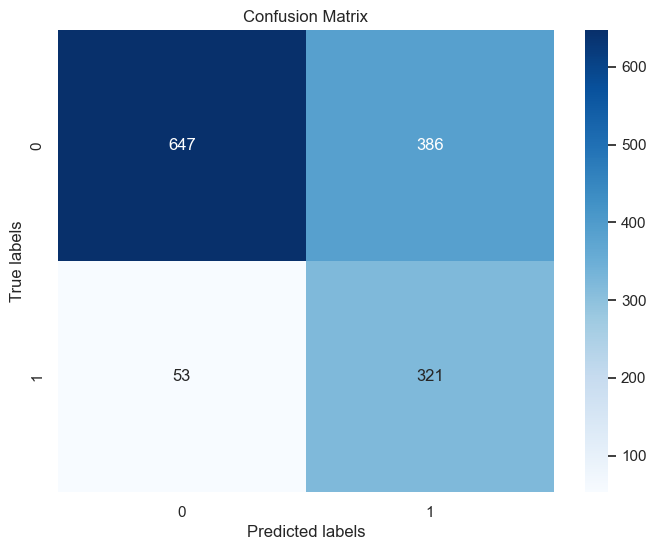

In [74]:
cm = metrics.confusion_matrix(Y_test_lri2, grid_lri2.predict(X_test_lri2))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 7. Resultados

### 7.1. Regresión Logística (Modelo Predictivo)

In [75]:
pd.options.display.max_columns = 26

pred_prob = pd.DataFrame(grid_lr.predict_proba(X_st))
pred = pd.DataFrame(grid_lr.predict(X_st))
pred_prob.index = X_st.index
pred.index = X_st.index
res = pd.concat([X_st, pred_prob], axis = 1)
res = res.rename(columns = {0 : 'P_No', 1 : 'P_Yes'})
res = pd.concat([res, pred], axis = 1)
res = res.rename(columns = {0 : 'Churn_pred'})
res = pd.concat([res, Y], axis = 1)
res_lr = res
res_lr

,SeniorCitizen,onehotencoder__gender_Female,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,tenure,Contract,MonthlyCharges,TotalCharges,P_No,P_Yes,Churn_pred,Churn
0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,-1.091939,-0.749494,-1.212797,-0.880380,0.418337,0.581663,1,0
1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0.205322,0.409312,-0.301203,-0.030261,0.762071,0.237929,0,0
2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,-1.052628,-0.749494,-0.405481,-0.844586,0.271740,0.728260,1,1
3,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.637743,0.409312,-0.794002,-0.052547,0.932846,0.067154,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,-1.052628,-0.749494,0.161322,-0.824701,0.057003,0.942997,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,-0.187787,0.409312,0.635619,0.015910,0.695555,0.304445,0,0
7039,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1.699138,0.409312,1.254561,2.471845,0.872174,0.127826,0,0
7040,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,-0.698829,-0.749494,-1.221207,-0.735650,0.652162,0.347838,0,0
7041,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,-0.974006,-0.749494,0.285783,-0.753867,0.069911,0.930089,1,1


### 7.2. Regresión Logística Interpretable (Modelo Predictivo con Ajustes de Modelo de Estadística Clásica)

In [76]:
pred_prob = pd.DataFrame(grid_lri2.predict_proba(X_st[['SeniorCitizen', 'onehotencoder__MultipleLines_Yes', 'onehotencoder__InternetService_DSL', 
                                'onehotencoder__InternetService_Fiber optic', 'onehotencoder__PaperlessBilling_Yes', 
                                'onehotencoder__PaymentMethod_Electronic check', 'tenure', 'Contract',
                                'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__TechSupport_Yes', 'MonthlyCharges']]))

pred = pd.DataFrame(grid_lri2.predict(X_st[['SeniorCitizen', 'onehotencoder__MultipleLines_Yes', 'onehotencoder__InternetService_DSL', 
                                'onehotencoder__InternetService_Fiber optic', 'onehotencoder__PaperlessBilling_Yes', 
                                'onehotencoder__PaymentMethod_Electronic check', 'tenure', 'Contract',
                                'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__TechSupport_Yes', 'MonthlyCharges']]))
pred_prob.index = X_st.index
pred.index = X_st.index

res = pd.concat([X_st, pred_prob], axis = 1)
res = res.rename(columns = {0 : 'P_No', 1 : 'P_Yes'})
res = pd.concat([res, pred], axis = 1)
res = res.rename(columns = {0 : 'Churn_pred'})
res = pd.concat([res, Y], axis = 1)
res_lri2 = res
res_lri2

,SeniorCitizen,onehotencoder__gender_Female,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_Yes,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,tenure,Contract,MonthlyCharges,TotalCharges,P_No,P_Yes,Churn_pred,Churn
0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,-1.091939,-0.749494,-1.212797,-0.880380,0.337980,0.662020,1,0
1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0.205322,0.409312,-0.301203,-0.030261,0.757694,0.242306,0,0
2,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,-1.052628,-0.749494,-0.405481,-0.844586,0.168207,0.831793,1,1
3,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.637743,0.409312,-0.794002,-0.052547,0.924369,0.075631,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,-1.052628,-0.749494,0.161322,-0.824701,0.081158,0.918842,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,-0.187787,0.409312,0.635619,0.015910,0.353331,0.646669,1,0
7039,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,0,1.699138,0.409312,1.254561,2.471845,0.771752,0.228248,0,0
7040,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,-0.698829,-0.749494,-1.221207,-0.735650,0.500321,0.499679,0,0
7041,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,-0.974006,-0.749494,0.285783,-0.753867,0.077664,0.922336,1,1
